<a href="https://colab.research.google.com/github/sexymonster/Dacon/blob/main/bok_choy/bok_choy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 인트로

## 1-1. 내용 설명

[주제]
환경 데이터로부터 청경채의 일별 잎면적 증감률 예측하는 AI 알고리즘 개발

[설명]
각 청경채 케이스의 생육 기간동안 1분 간격으로 수집된 환경 데이터로부터 일별 잎면적 증감률을 예측

[링크]
https://dacon.io/competitions/official/235961/overview/description

## 1-2. 패키지 로드

In [ ]:
from google.colab import drive

import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt


## 1-3. 데이터 로드

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/bok_choy/"

train_input_list = sorted(glob.glob(path+"train_input/*.csv"))
train_target_list = sorted(glob.glob(path+"train_target/*.csv"))
test_input_list = sorted(glob.glob(path+"test_input/*.csv"))
test_target_list = sorted(glob.glob(path+"test_target/*.csv"))

# 데이터 전처리

## 2-1. 데이터 확인

In [ ]:
train_input_data = []
for i in train_input_list:
  data = pd.read_csv(i)
  train_input_data.append(data)

train_target_data = []
for i in train_target_list:
  data = pd.read_csv(i)
  train_target_data.append(data)

In [ ]:
len(train_input_data)

58

한달간의 관측치를 1분단위로 기록함

In [ ]:
train_input_data[0]

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,...,카메라상태,냉방온도,난방온도,기준온도,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,2021-02-17 00:00:00,24.799999,40.500000,361.0,0.059069,20.299999,33.200001,0.0,0.0,0.0,...,4.5,0.0,0.0,363.554,16.548,37.596000,363.554,309.41,16.548,37.596
1,2021-02-17 00:01:00,20.500000,44.099998,355.0,0.910134,19.700001,10.700000,0.0,0.0,0.0,...,0.0,20.0,18.0,19.000,0.000,2.500000,0.000,0.00,0.000,0.000
2,2021-02-17 00:02:00,20.600000,44.299999,360.0,0.910134,19.799999,10.600000,0.0,0.0,0.0,...,0.0,20.0,18.0,19.000,0.000,3.000002,0.000,0.00,0.000,0.000
3,2021-02-17 00:03:00,20.600000,44.500000,359.0,0.908579,19.799999,10.400000,0.0,0.0,0.0,...,0.0,20.0,18.0,19.000,0.000,3.000002,0.000,0.00,0.000,0.000
4,2021-02-17 00:04:00,20.600000,44.500000,357.0,0.910134,19.799999,10.300000,0.0,0.0,0.0,...,0.0,20.0,18.0,19.000,0.000,3.000002,0.000,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41755,2021-03-17 23:55:00,20.400000,78.000000,470.0,0.313223,20.400000,31.500000,0.0,0.0,769.0,...,0.0,20.0,18.0,19.000,0.000,1.999998,0.000,0.00,0.000,0.000
41756,2021-03-17 23:56:00,20.400000,78.199997,471.0,0.314777,20.500000,31.400000,0.0,0.0,769.0,...,0.0,20.0,18.0,19.000,0.000,1.999998,0.000,0.00,0.000,0.000
41757,2021-03-17 23:57:00,20.500000,79.199997,468.0,0.315554,20.600000,31.299999,0.0,0.0,769.0,...,0.0,20.0,18.0,19.000,0.000,1.999998,0.000,0.00,0.000,0.000
41758,2021-03-17 23:58:00,20.600000,79.599998,471.0,0.316332,20.799999,31.200001,0.0,0.0,769.0,...,0.0,20.0,18.0,19.000,0.000,2.500000,0.000,0.00,0.000,0.000


In [ ]:
ip_df = train_input_data[0]

In [ ]:
ip_df.describe()

,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,일간누적분무량,...,카메라상태,냉방온도,난방온도,기준온도,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
count,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,...,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000
mean,23.256809,55.422683,388.852807,0.737887,21.502344,23.871815,2.406952,1.462690,709.256030,6020.974956,...,0.683618,22.395211,20.395259,21.403941,0.000605,4.639615,84.652694,58.486144,22.317093,3.849457
std,2.339156,19.117794,48.603578,0.188674,1.813407,5.099884,21.844382,12.659996,196.075486,4114.333020,...,11.633410,2.393835,2.393407,2.919250,0.082587,4.856239,174.108895,118.970316,51.005795,9.950972
min,18.200001,9.500000,324.000000,0.000000,16.299999,8.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.799999,39.200001,353.000000,0.555718,20.400000,23.000000,0.000000,0.000000,762.570000,2294.140000,...,0.000000,20.000000,18.000000,19.000000,0.000000,1.999998,0.000000,0.000000,0.000000,0.000000
50%,23.700001,61.400002,370.000000,0.832411,21.600000,25.100000,0.000000,0.000000,769.000000,6132.710000,...,0.000000,21.666194,19.666194,20.666602,0.000000,3.500004,0.000000,0.000000,0.000000,0.000000
75%,25.500000,71.599998,416.000000,0.904693,22.799999,27.000000,0.000000,0.000000,769.000000,9971.280000,...,0.000000,25.000000,23.000000,24.000000,0.000000,5.500002,0.000000,0.000000,0.000000,0.000000
max,27.500000,85.699997,987.000000,0.925678,26.600000,33.500000,201.000000,119.000000,769.000000,14585.280000,...,201.000000,25.000000,23.000000,363.554000,16.548000,37.596000,496.821000,309.410000,165.480000,61.093500


In [ ]:
list(ip_df)

['시간',
 '내부온도관측치',
 '내부습도관측치',
 'CO2관측치',
 'EC관측치',
 '외부온도관측치',
 '외부습도관측치',
 '펌프상태',
 '펌프작동남은시간',
 '최근분무량',
 '일간누적분무량',
 '냉방상태',
 '냉방작동남은시간',
 '난방상태',
 '난방작동남은시간',
 '내부유동팬상태',
 '내부유동팬작동남은시간',
 '외부환기팬상태',
 '외부환기팬작동남은시간',
 '화이트 LED상태',
 '화이트 LED작동남은시간',
 '화이트 LED동작강도',
 '레드 LED상태',
 '레드 LED작동남은시간',
 '레드 LED동작강도',
 '블루 LED상태',
 '블루 LED작동남은시간',
 '블루 LED동작강도',
 '카메라상태',
 '냉방온도',
 '난방온도',
 '기준온도',
 '난방부하',
 '냉방부하',
 '총추정광량',
 '백색광추정광량',
 '적색광추정광량',
 '청색광추정광량']

In [ ]:
tg_df = train_target_data[0]

In [ ]:
list(tg_df)

['시간', 'rate']

In [ ]:
tg_df

,시간,rate
0,2021-02-18 00:00:00,0.50000
1,2021-02-19 00:00:00,0.66667
2,2021-02-20 00:00:00,0.60000
3,2021-02-21 00:00:00,-0.12500
4,2021-02-22 00:00:00,1.42857
5,2021-02-23 00:00:00,0.35294
6,2021-02-24 00:00:00,0.30435
7,2021-02-25 00:00:00,0.16667
8,2021-02-26 00:00:00,0.22857
9,2021-02-27 00:00:00,0.32558


In [ ]:
df = pd.DataFrame(columns=['시간',
 '내부온도관측치',
 '내부습도관측치',
 'CO2관측치',
 'EC관측치',
 '외부온도관측치',
 '외부습도관측치',
 '펌프상태',
 '펌프작동남은시간',
 '최근분무량',
 '일간누적분무량',
 '냉방상태',
 '냉방작동남은시간',
 '난방상태',
 '난방작동남은시간',
 '내부유동팬상태',
 '내부유동팬작동남은시간',
 '외부환기팬상태',
 '외부환기팬작동남은시간',
 '화이트 LED상태',
 '화이트 LED작동남은시간',
 '화이트 LED동작강도',
 '레드 LED상태',
 '레드 LED작동남은시간',
 '레드 LED동작강도',
 '블루 LED상태',
 '블루 LED작동남은시간',
 '블루 LED동작강도',
 '카메라상태',
 '냉방온도',
 '난방온도',
 '기준온도',
 '난방부하',
 '냉방부하',
 '총추정광량',
 '백색광추정광량',
 '적색광추정광량',
 '청색광추정광량'])
for i in range(len(train_input_data)):
  for j in range(len(train_input_data[i])):
    if train_input_data[i].loc[j]["시간"].split()[1] == "00:00:00":
        df = df.append(train_input_data[i].loc[j], ignore_index = True)

df

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,...,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,펌프작동남은시간.1,외부습도추정관측치,외부온도추정관측치,펌프일간누적분무량,펌프최근분무량
0,2021-02-17 00:00:00,24.799999,40.500000,361.0,0.059069,20.299999,33.200001,0.0,0.0,0.0,...,37.596000,363.554,309.41,16.548,37.596,NaN,NaN,NaN,NaN,NaN
1,2021-02-18 00:00:00,19.799999,55.099998,426.0,0.906247,18.400000,9.800000,0.0,0.0,0.0,...,0.000000,0.000,0.00,0.000,0.000,NaN,NaN,NaN,NaN,NaN
2,2021-02-19 00:00:00,19.100000,54.099998,361.0,0.896144,17.500000,12.100000,0.0,0.0,0.0,...,0.000000,0.000,0.00,0.000,0.000,NaN,NaN,NaN,NaN,NaN
3,2021-02-20 00:00:00,19.799999,23.200001,352.0,0.899252,18.900000,19.900000,0.0,0.0,0.0,...,0.000000,0.000,0.00,0.000,0.000,NaN,NaN,NaN,NaN,NaN
4,2021-02-21 00:00:00,20.900000,21.200001,344.0,0.907025,20.799999,19.000000,0.0,0.0,0.0,...,4.499998,0.000,0.00,0.000,0.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,2022-06-10 00:00:00,22.100000,70.699997,508.0,0.013184,25.200001,41.500000,0.0,0.0,NaN,...,40.500002,0.000,0.00,0.000,0.000,NaN,NaN,NaN,769.0,769.0
1809,2022-06-11 00:00:00,22.100000,67.199997,527.0,0.012408,25.200001,41.500000,0.0,0.0,NaN,...,40.500002,0.000,0.00,0.000,0.000,NaN,NaN,NaN,769.0,769.0
1810,2022-06-12 00:00:00,21.799999,66.199997,525.0,0.010857,25.200001,41.500000,0.0,0.0,NaN,...,38.999996,0.000,0.00,0.000,0.000,NaN,NaN,NaN,769.0,769.0
1811,2022-06-13 00:00:00,21.799999,66.099998,427.0,0.010857,25.200001,41.500000,0.0,0.0,NaN,...,39.499998,0.000,0.00,0.000,0.000,NaN,NaN,NaN,769.0,769.0


In [ ]:
df1 = pd.DataFrame(columns=['시간', 'rate'])
for i in range(len(train_target_data)):
  for j in range(len(train_target_data[i])):
    df1 = df1.append(train_target_data[i].loc[j], ignore_index = True)
df1

,시간,rate
0,2021-02-18 00:00:00,0.50000
1,2021-02-19 00:00:00,0.66667
2,2021-02-20 00:00:00,0.60000
3,2021-02-21 00:00:00,-0.12500
4,2021-02-22 00:00:00,1.42857
...,...,...
1808,2022-06-11 00:00:00,-0.07888
1809,2022-06-12 00:00:00,-0.15838
1810,2022-06-13 00:00:00,-0.47374
1811,2022-06-14 00:00:00,-0.51767


In [ ]:
df1.시간.value_counts()

2021-06-08 00:00:00    12
2021-06-10 00:00:00    12
2021-06-11 00:00:00    12
2021-06-12 00:00:00    12
2021-06-13 00:00:00    12
                       ..
2021-07-18 00:00:00     1
2021-07-17 00:00:00     1
2021-07-16 00:00:00     1
2021-03-18 00:00:00     1
2022-06-15 00:00:00     1
Name: 시간, Length: 333, dtype: int64

In [ ]:
train_df = pd.merge(df, df1, on="시간")

In [ ]:
train_df

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,...,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,펌프작동남은시간.1,외부습도추정관측치,외부온도추정관측치,펌프일간누적분무량,펌프최근분무량,rate
0,2021-02-18 00:00:00,19.799999,55.099998,426.0,0.906247,18.400000,9.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.50000
1,2021-02-19 00:00:00,19.100000,54.099998,361.0,0.896144,17.500000,12.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.66667
2,2021-02-20 00:00:00,19.799999,23.200001,352.0,0.899252,18.900000,19.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.60000
3,2021-02-21 00:00:00,20.900000,21.200001,344.0,0.907025,20.799999,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.12500
4,2021-02-22 00:00:00,20.900000,70.099998,362.0,0.908579,21.600000,25.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.42857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14068,2022-06-10 00:00:00,22.100000,70.699997,508.0,0.013184,25.200001,41.5,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,769.0,769.0,-0.08958
14069,2022-06-11 00:00:00,22.100000,67.199997,527.0,0.012408,25.200001,41.5,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,769.0,769.0,-0.07888
14070,2022-06-12 00:00:00,21.799999,66.199997,525.0,0.010857,25.200001,41.5,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,769.0,769.0,-0.15838
14071,2022-06-13 00:00:00,21.799999,66.099998,427.0,0.010857,25.200001,41.5,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,769.0,769.0,-0.47374


In [ ]:
train_df.corr().rate

내부온도관측치         -0.017147
내부습도관측치         -0.048383
CO2관측치          -0.006713
EC관측치            0.010916
외부온도관측치         -0.012747
외부습도관측치         -0.049875
펌프상태            -0.000073
펌프작동남은시간        -0.007618
최근분무량            0.001653
일간누적분무량          0.001128
냉방상태            -0.004745
냉방작동남은시간         0.029697
난방상태            -0.007779
난방작동남은시간        -0.001895
내부유동팬상태         -0.003270
내부유동팬작동남은시간     -0.003267
외부환기팬상태         -0.020254
외부환기팬작동남은시간     -0.023261
화이트 LED상태       -0.013193
화이트 LED작동남은시간   -0.003613
화이트 LED동작강도      0.012288
레드 LED상태        -0.021131
레드 LED작동남은시간    -0.003023
레드 LED동작강도       0.004901
블루 LED상태        -0.018266
블루 LED작동남은시간    -0.003836
블루 LED동작강도       0.028986
카메라상태            0.006201
냉방온도            -0.030249
난방온도            -0.021293
기준온도            -0.019592
난방부하            -0.005820
냉방부하             0.008244
총추정광량            0.029362
백색광추정광량          0.027906
적색광추정광량          0.024432
청색광추정광량          0.027605
펌프작동남은시간.1            NaN
외부습도추정관측치   

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_

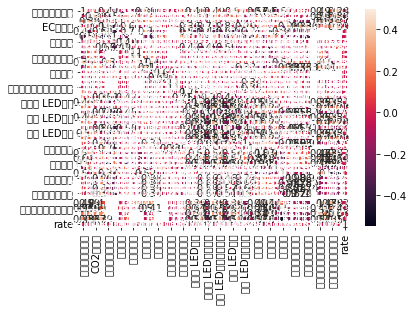

In [ ]:
sns.heatmap(train_df.corr(), linewidths = 0.1, vmax = 0.5, linecolor="white",annot=True)
plt.show()

## 2-2. 데이터셋 커스텀

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, input_paths, target_paths, infer_mode):
        self.input_paths = input_paths
        self.target_paths = target_paths
        self.infer_mode = infer_mode
        
        self.data_list = []
        self.label_list = []
        print('Data Pre-processing..')
        for input_path, target_path in tqdm(zip(self.input_paths, self.target_paths)):
            input_df = pd.read_csv(input_path)
            target_df = pd.read_csv(target_path)
            
            input_df = input_df.drop(columns=['시간'])
            input_df = input_df.fillna(0)
            
            input_length = int(len(input_df)/1440)
            target_length = int(len(target_df))
            
            for idx in range(target_length):
                time_series = input_df[1440*idx:1440*(idx+1)].values
                self.data_list.append(torch.Tensor(time_series))
            for label in target_df["rate"]:
                self.label_list.append(label)
        print('Done.')
              
    def __getitem__(self, index):
        data = self.data_list[index]
        label = self.label_list[index]
        if self.infer_mode == False:
            return data, label
        else:
            return data
        
    def __len__(self):
        return len(self.data_list)